<a href="https://colab.research.google.com/github/lufemartin/ProyectoEquipo3Analisis/blob/main/Proyecto_Grupo_3_(Luisa%2C_Sandra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importar librerias

import pandas as pd   ## Libreria Pandas para analisis de datos
import matplotlib.pyplot as plt   ## Libreria Matplolib para realizar graficas
import seaborn as sns    ## Libreria Seaborn para realizar graficas estadisticas

In [ ]:
## Cargar la base de datos

Condiciones_Economicas = pd.read_excel("/content/drive/MyDrive/01022025_Anonimizada Envigado.xlsx", sheet_name="Sisbén")

In [ ]:
type(Condiciones_Economicas)

pandas.core.frame.DataFrame

In [ ]:
# Validación de cantidad de filas y columnas en el DF
Condiciones_Economicas.shape

(133180, 150)

In [ ]:
## Obtención de tipo de dato de cada columna
Condiciones_Economicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133180 entries, 0 to 133179
Columns: 150 entries, cod_dpto to Clasificacion
dtypes: int64(146), object(4)
memory usage: 152.4+ MB


In [ ]:
# Se realiza un for para cambiar el tipo de datos de las columnas para que el DataFrame sea menos pesado

for column in Condiciones_Economicas.columns:
  if Condiciones_Economicas[column].dtype == 'int64':
    Condiciones_Economicas = Condiciones_Economicas.astype({column:"int32"})


In [ ]:
# Se baja el uso de memoria del DF de 152 a 78 MB
Condiciones_Economicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133180 entries, 0 to 133179
Columns: 150 entries, cod_dpto to Clasificacion
dtypes: int32(146), object(4)
memory usage: 78.2+ MB


In [ ]:
## Validación de qué columnas tiene del DF
Condiciones_Economicas.columns

Index(['cod_dpto', 'cod_mpio', 'Cod_clase', 'Cod_corregimiento',
       'NOM_CORREGIMIENTO', 'Cod_vereda', 'NOM_VEREDA', 'Cod_barrio',
       'NOM_BARRIO', 'tip_vivienda',
       ...
       'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15',
       'Clasificacion'],
      dtype='object', length=150)

In [ ]:
## Validación de los estadísticos descriptivos básicos
Condiciones_Economicas.describe()

,cod_dpto,cod_mpio,Cod_clase,Cod_corregimiento,Cod_vereda,Cod_barrio,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,...,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15
count,133180.0,133180.0,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,...,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.00000
mean,5.0,5266.0,1.078721,0.107043,2.496771,155.966166,1.687010,1.066827,2.030372,1.001314,...,0.000285,0.173592,0.307659,0.128766,0.018178,0.013283,0.007449,0.000405,0.000713,0.06317
std,0.0,0.0,0.374904,3.253596,38.753617,11624.690301,0.502909,0.377305,0.226131,0.036226,...,0.016889,0.378760,0.461526,0.334942,0.133597,0.114483,0.085983,0.020132,0.026699,0.24327
min,5.0,5266.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,5.0,5266.0,1.000000,0.000000,0.000000,6.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5.0,5266.0,1.000000,0.000000,0.000000,14.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,5.0,5266.0,1.000000,0.000000,0.000000,24.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,5.0,5266.0,3.000000,99.000000,999.000000,999999.000000,4.000000,7.000000,6.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
# Se corre herramienta para mostrar de otra forma los estadísticos descriptivos del DF
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatib

In [ ]:
# Aplicación Skimpy para visualizar estadísticas descriptivas
from skimpy import skim

skim(Condiciones_Economicas)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 133180 │ │ int64       │ 146   │                                                          │
│ │ Number of columns │ 150    │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA % ┃ mean      ┃ sd       ┃ p0   ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ cod_dpto       │  0 │    0 │         5 │        0 │    5 │       5 │       5 │       5 │        5 │     █  │  │
│ │ cod_mpio       │  0 │    0 │      5266 │        0 │ 5266 │    5266 │    5266 │    5266 │     5266 │     █  │  │
│ │ Cod_clase      │  0 │    0 │     1.079 │   0.3749 │    1 │       1 │       1 │       1 │        3 │   █    │  │
│ │ Cod_corregimie │  0 │    0 │     0.107 │    3.254 │    0 │       0 │       0 │       0 │       99 │   █    │  │
│ │ nto            │    │      │           │          │      │         │         │         │          │        │  │
│ │ Cod_vereda     │  0 │    0 │     2.497 │    38.75 │    0 │       0 │       0 │       0 │      999 │   █    │  │
│ │ Cod_barrio     │  0 │    0 │       156 │    11620 │    0 │       6 │      14 │      24 │  1000000 │   █    │  │
│ │ tip_vivienda   │  0 │    0 │     1.687 │   0.5029 │    1 │       1 │       2 │       2 │        4 │  ▄ █   │  │
│ │ tip_mat_parede │  0 │    0 │     1.067 │   0.3773 │    1 │       1 │       1 │       1 │        7 │   █    │  │
│ │ s              │    │      │           │          │      │         │         │         │          │        │  │
│ │ tip_mat_pisos  │  0 │    0 │      2.03 │   0.2261 │    1 │       2 │       2 │       2 │        6 │    █   │  │
│ │ ind_tiene_ener │  0 │    0 │     1.001 │  0.03623 │    1 │       1 │       1 │       1 │        2 │   █    │  │
│ │ gia            │    │      │           │          │      │         │         │         │          │        │  │
│ │ tip_estrato_en │  0 │    0 │     3.043 │    3.609 │    0 │       2 │       3 │       3 │       99 │   █    │  │
│ │ ergia          │    │      │           │          │      │         │         │         │          │        │  │
│ │ ind_tiene_alca │  0 │    0 │     1.023 │   0.1511 │    1 │       1 │       1 │       1 │        2 │   █    │  │
│ │ ntarillado     │    │      │           │          │      │         │         │         │          │        │  │
│ │ ind_tiene_gas  │  0 │    0 │     1.108 │   0.3108 │    1 │       1 │       1 │       1 │        2 │ █    ▁ │  │
│ │ ind_tiene_reco │  0 │    0 │     1.007 │   0.0862 │    1 │       1 │       1 │       1 │        2 │   █    │  │
│ │ leccion        │    │      │           │          │      │         │         │         │          │        │  │
│ │ ind_tiene_acue │  0 │    0 │     1.013 │   0.1111 │    1 │       1 │       1 │       1 │        2 │   █    │  │
│ │ ducto          │    │      │           │          │      │         │         │         │          │        │  │
│ │ tip_estrato_ac │  0 │    0 │     4.099 │    10.65 │ 

In [ ]:
## Indentificación de valores nulos
Condiciones_Economicas.isnull()

,cod_dpto,cod_mpio,Cod_clase,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,tip_vivienda,...,I7,I8,I9,I10,I11,I12,I13,I14,I15,Clasificacion
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133175,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
133176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
133177,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
133178,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
## Conocer cuántos valores nulos por columna
df_nulo_Condiciones=Condiciones_Economicas.isnull().sum()
df_nulo_Condiciones

,0
cod_dpto,0
cod_mpio,0
Cod_clase,0
Cod_corregimiento,0
NOM_CORREGIMIENTO,0
...,...
I12,0
I13,0
I14,0
I15,0


In [ ]:
## Al ser tantas columnas realizamos una verificación de valores nulos buscando cuantas son mayor que 0
df_nulo_Condiciones[df_nulo_Condiciones > 0]

,0


In [ ]:
## Validación de resgistros duplicados
DF_duplicados=Condiciones_Economicas.duplicated()
DF_duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
133175,False
133176,False
133177,False
133178,False


In [ ]:
## Contabilización de registros duplicados
DF_duplicados.sum()

np.int64(131)

In [ ]:
## Visualización de cuales registros estan repetidos y en que columna estan
for index, value in DF_duplicados.items():  ## Itera a lo largo de los duplicados
  if value is True:   ## Si el valor es TRUE, quiere decir que es duplicado
    print(Condiciones_Economicas.iloc[index])  ## Busco en el DF original el registro de acuerdo a su indice

cod_dpto                             5
cod_mpio                          5266
Cod_clase                            1
Cod_corregimiento                    0
NOM_CORREGIMIENTO    SIN CORREGIMIENTO
                           ...        
I12                                  0
I13                                  0
I14                                  0
I15                                  0
Clasificacion                      C12
Name: 574, Length: 150, dtype: object
cod_dpto                             5
cod_mpio                          5266
Cod_clase                            1
Cod_corregimiento                    0
NOM_CORREGIMIENTO    SIN CORREGIMIENTO
                           ...        
I12                                  0
I13                                  0
I14                                  0
I15                                  1
Clasificacion                      C02
Name: 2900, Length: 150, dtype: object
cod_dpto                             5
cod_mpio                  

In [ ]:
## Identificación de las columnas del DF
columnas_df = Condiciones_Economicas.columns
columnas_df

Index(['cod_dpto', 'cod_mpio', 'Cod_clase', 'Cod_corregimiento',
       'NOM_CORREGIMIENTO', 'Cod_vereda', 'NOM_VEREDA', 'Cod_barrio',
       'NOM_BARRIO', 'tip_vivienda',
       ...
       'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15',
       'Clasificacion'],
      dtype='object', length=150)

In [ ]:
## Identificación de resgistros dentro de una columna
pd.unique(Condiciones_Economicas.NOM_VEREDA)

array(['SIN VEREDA', 'PALMAS', 'VEREDA EL ESCOBERO', 'VEREDA EL VALLANO',
       'VEREDA SANTA CATALINA'], dtype=object)

In [ ]:
pd.unique(Condiciones_Economicas.NOM_BARRIO)

array(['SAN JOSE', 'LA MINA', 'LOS NARANJOS', 'LAS FLORES', 'OBRERO',
       'SAN RAFAEL', 'URIBE ANGEL', 'LA MAGNOLIA', 'LA PAZ', 'EL SALADO',
       'EL CHINGUI', 'ALTO DE MISAEL', 'LA SEBASTIANA', 'EL DORADO',
       'MESA', 'EL TRIANON', 'LOMA DEL BARRO', 'CP EL CHOCHO',
       'BARRIO_S4', 'CP LAS PALMAS', 'LAS ORQUIDEAS',
       'CP BARRIO CHINGUI 1 Y 2', 'CP BARRIO NUEVO Y SANTIAGO APO',
       'PRIMAVERA', 'LA PRADERA', 'LOMA DEL ATRAVEZADO',
       'CP BARRIO SAN RAFAEL PARTE ALTA', 'EL ESMERALDAL', 'SAN MARCOS',
       'ALCALA', 'ZONA CENTRO', 'JARDINES', 'LOMA DE LAS BRUJAS',
       'ZUÑIGA', 'EL CHOCHO', 'CP EL ESCOBERO', 'LAS ANTILLAS',
       'MILAN-VALLEJUELOS', 'LAS CASITAS', 'LA INMACULADA', 'PONTEVEDRA',
       'BUCAREST', 'VILLAGRANDE', 'EL PORTAL', 'BOSQUES DE ZUÑIGA',
       'CP EL CAPIRO', 'LAS VEGAS', 'CP PARTE ALTA DEL SALADO',
       'CP LA ESPERANZA', 'CP MESETAS'], dtype=object)

In [ ]:
# Eliminación de columnas que no serán útiles en el análisis a realizar

columnas_para_eliminar = ['cod_dpto', 'cod_mpio', 'H_5', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15']
Condiciones_Economicas_Final = Condiciones_Economicas.drop(columnas_para_eliminar, axis=1)

# Verificación que las columnas se hayan eliminado correctamente
Condiciones_Economicas_Final.columns

Index(['Cod_clase', 'Cod_corregimiento', 'NOM_CORREGIMIENTO', 'Cod_vereda',
       'NOM_VEREDA', 'Cod_barrio', 'NOM_BARRIO', 'tip_vivienda',
       'tip_mat_paredes', 'tip_mat_pisos',
       ...
       'vlr_ingr_remesa_exterior', 'ind_ingr_arriendos', 'vlr_ingr_arriendos',
       'ind_otros_ingresos', 'vlr_otros_ingresos', 'ind_ingr_estado',
       'vlr_ingr_fam_accion', 'vlr_ingr_col_mayor', 'vlr_ingr_otro_subsidio',
       'Clasificacion'],
      dtype='object', length=132)

In [ ]:
## Cambiar valor de un campo
Condiciones_Economicas_Final.replace({"BARRIO_S4" : "INDETERMINADO"}, inplace = True)

In [ ]:
# Agrupar de la base Condiciones_Economicas_Final, los datos de Clasificación así:
# A1 - A5: Pobreza extrema
# B1 - B7: Pobreza moderada
# C1 - C18: Vulnerable
# D1 - D21: No pobre, no vulnerable

def clasificar_sisben(clasificacion):
    if pd.isna(clasificacion):
        return "Sin Clasificación"
    elif clasificacion.startswith("A"):
        return "Pobreza extrema"
    elif clasificacion.startswith("B"):
        return "Pobreza moderada"
    elif clasificacion.startswith("C"):
        return "Vulnerable"
    elif clasificacion.startswith("D"):
        return "No pobre, no vulnerable"
    else:
        return "Otra clasificación"

# Adicionar la columna 'Grupo_Sisben' con los datos de la función anterior
Condiciones_Economicas_Final['Grupo_Sisben'] = Condiciones_Economicas_Final['Clasificacion'].apply(clasificar_sisben)
Condiciones_Economicas_Final.head()


,Cod_clase,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,tip_vivienda,tip_mat_paredes,tip_mat_pisos,...,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,Clasificacion,Grupo_Sisben
0,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,2,1,2,...,2,0,2,0,2,0,0,0,C04,Vulnerable
1,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,2,1,2,...,2,0,2,0,2,0,0,0,C04,Vulnerable
2,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,2,1,2,...,2,0,2,0,2,0,0,0,C04,Vulnerable
3,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,1,1,2,...,99,0,99,0,99,0,0,0,D01,"No pobre, no vulnerable"
4,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,1,1,2,...,9,0,9,0,2,0,0,0,D01,"No pobre, no vulnerable"


In [ ]:
# Crear tabla en la que se muestre por NOM_BARRIO y NOM_VEREDA el porcentaje de cada Grupo_Sisben

# Contero de los grupos del Sisben por Barrio y Vereda
percentage_sisben = Condiciones_Economicas_Final.groupby(['NOM_BARRIO', 'NOM_VEREDA', 'Grupo_Sisben'])['Grupo_Sisben'].count().unstack(fill_value=0)

# Calculo del total de datos por Grupo_Sisben de cada Barrio y Vereda
total_counts = percentage_sisben.sum(axis=1)

# Calculo del porcentaje de cada grupo Sisben por Barrio y VeredA
for column in percentage_sisben.columns:
  percentage_sisben[column] = (percentage_sisben[column] / total_counts) * 100

percentage_sisben


,Grupo_Sisben,"No pobre, no vulnerable",Pobreza extrema,Pobreza moderada,Vulnerable
NOM_BARRIO,NOM_VEREDA,,,,
ALCALA,SIN VEREDA,58.185761,0.831225,4.987351,35.995663
ALTO DE MISAEL,SIN VEREDA,32.546584,3.664596,15.590062,48.198758
BOSQUES DE ZUÑIGA,SIN VEREDA,94.495413,0.000000,0.000000,5.504587
BUCAREST,SIN VEREDA,62.100457,0.000000,2.283105,35.616438
CP BARRIO CHINGUI 1 Y 2,SIN VEREDA,45.916795,3.697997,13.020031,37.365177
CP BARRIO NUEVO Y SANTIAGO APO,SIN VEREDA,17.386935,4.321608,24.221106,54.070352
CP BARRIO SAN RAFAEL PARTE ALTA,SIN VEREDA,15.136226,9.889001,21.796165,53.178607
CP EL CAPIRO,SIN VEREDA,92.307692,0.000000,0.000000,7.692308
CP EL CHOCHO,SIN VEREDA,61.010830,0.000000,8.664260,30.324910


In [ ]:
# Registros que han sufrido inundación, avalancha, terremoto, incedio, vendaval o hundimiento

Eventos_Adversos = Condiciones_Economicas_Final [(Condiciones_Economicas_Final['ind_evento_inundacion'] == 1)|
                   (Condiciones_Economicas_Final['ind_evento_avalancha'] == 1)|
                   (Condiciones_Economicas_Final['ind_evento_terremoto'] == 1)|
                   (Condiciones_Economicas_Final['ind_evento_incendio'] == 1)|
                   (Condiciones_Economicas_Final["ind_evento_vendaval"]==1)|
                   (Condiciones_Economicas_Final["ind_evento_hundimiento"]==1)]
Eventos_Adversos

,Cod_clase,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,tip_vivienda,tip_mat_paredes,tip_mat_pisos,...,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,Clasificacion,Grupo_Sisben
289,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,1,1,2,...,2,0,2,0,2,0,0,0,C04,Vulnerable
290,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,1,1,2,...,2,0,2,0,2,0,0,0,C04,Vulnerable
291,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,1,1,2,...,2,0,2,0,2,0,0,0,C04,Vulnerable
292,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,1,1,2,...,2,0,2,0,2,0,0,0,C04,Vulnerable
293,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,14,SAN JOSE,1,1,2,...,2,0,2,0,2,0,0,0,C04,Vulnerable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132891,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,34,ALTO DE MISAEL,2,1,2,...,2,0,2,0,2,0,0,0,C08,Vulnerable
132892,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,34,ALTO DE MISAEL,2,1,2,...,2,0,2,0,2,0,0,0,C08,Vulnerable
132893,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,34,ALTO DE MISAEL,2,1,2,...,2,0,2,0,9,0,0,0,C08,Vulnerable
132894,1,0,SIN CORREGIMIENTO,0,SIN VEREDA,34,ALTO DE MISAEL,2,1,2,...,2,0,2,0,2,0,0,0,C08,Vulnerable


In [ ]:
# Mostrar columnas específicas del DataFrame
Inf_Ubicacion = ['NOM_VEREDA', 'NOM_BARRIO']
df_columnas_especificas = Eventos_Adversos[Inf_Ubicacion]
df_columnas_especificas


,NOM_VEREDA,NOM_BARRIO
289,SIN VEREDA,SAN JOSE
290,SIN VEREDA,SAN JOSE
291,SIN VEREDA,SAN JOSE
292,SIN VEREDA,SAN JOSE
293,SIN VEREDA,SAN JOSE
...,...,...
132891,SIN VEREDA,ALTO DE MISAEL
132892,SIN VEREDA,ALTO DE MISAEL
132893,SIN VEREDA,ALTO DE MISAEL
132894,SIN VEREDA,ALTO DE MISAEL


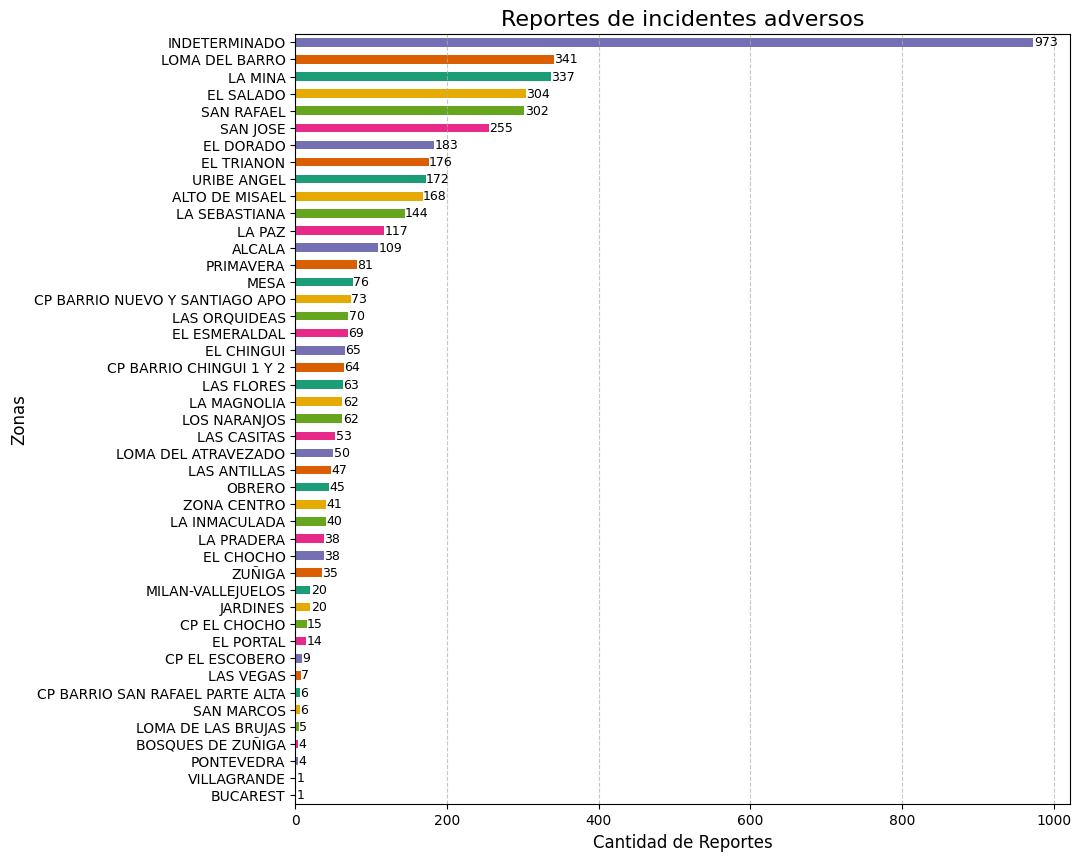

In [ ]:
# Grafico para analizar zonas y barrios con mayor reporte de incidencia de inundación, avalancha, terremoto, incendio, vendaval o hundimiento, ordenado de mayor a menor incidencia
plt.figure(figsize=(10, 10)) ## Se da tamaño al gráfico
ax = df_columnas_especificas.groupby('NOM_BARRIO').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) ## Se agrupa para que ordene de mayor a menor
plt.title('Reportes de incidentes adversos', fontsize=16) # Título del gráfico
plt.xlabel('Cantidad de Reportes', fontsize=12) # Nombre para eje X
plt.ylabel('Zonas', fontsize=12) # Nombre para eje y
ax.grid(axis='x', linestyle='--', alpha=0.7) # Agregar líneas verticales de cuadricula

## Adicionar etiqueta de valor a cada barra
for i, v in enumerate(df_columnas_especificas.groupby('NOM_BARRIO').size().sort_values()):
  ax.text(v + 0.5, i, str(v), va='center', fontsize=9)

In [ ]:
top_10_barrios = df_columnas_especificas.groupby('NOM_BARRIO').size().sort_values(ascending=False).head(10)

# Crea DataFrame del top 10 barrios
top_10_df = pd.DataFrame({'NOM_BARRIO': top_10_barrios.index, 'Count': top_10_barrios.values})

# Display the DataFrame
top_10_df


,NOM_BARRIO,Count
0,INDETERMINADO,973
1,LOMA DEL BARRO,341
2,LA MINA,337
3,EL SALADO,304
4,SAN RAFAEL,302
5,SAN JOSE,255
6,EL DORADO,183
7,EL TRIANON,176
8,URIBE ANGEL,172
9,ALTO DE MISAEL,168


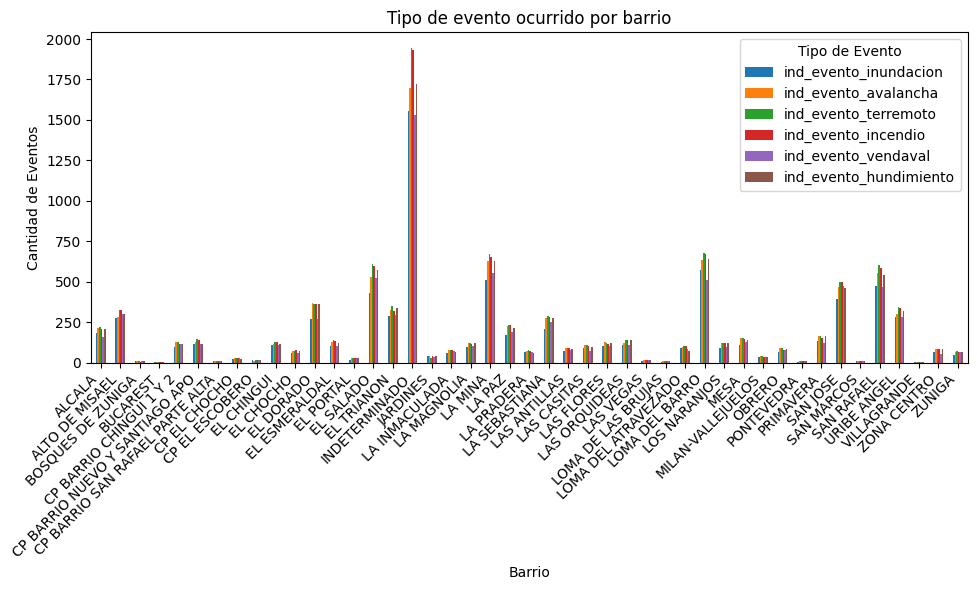

In [ ]:
# Graficar ahora los eventos producidos en los 10 barrios con mayor ocurrencia

# Se crea nuevo DF con la columnas requeridas
Ocurrencia_Barrio = Eventos_Adversos[['NOM_BARRIO', "NOM_VEREDA",'ind_evento_inundacion', 'ind_evento_avalancha', 'ind_evento_terremoto', 'ind_evento_incendio',
                                      'ind_evento_vendaval', 'ind_evento_hundimiento']]

# Se agrupan y suman los eventos por barrio
eventos_barrios_agrupados = Ocurrencia_Barrio.groupby('NOM_BARRIO').sum()

# Elaboración de la grafica
eventos_barrios_agrupados.plot(kind='bar', figsize=(10, 6))
plt.title('Tipo de evento ocurrido por barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Evento')
plt.tight_layout()
plt.show()


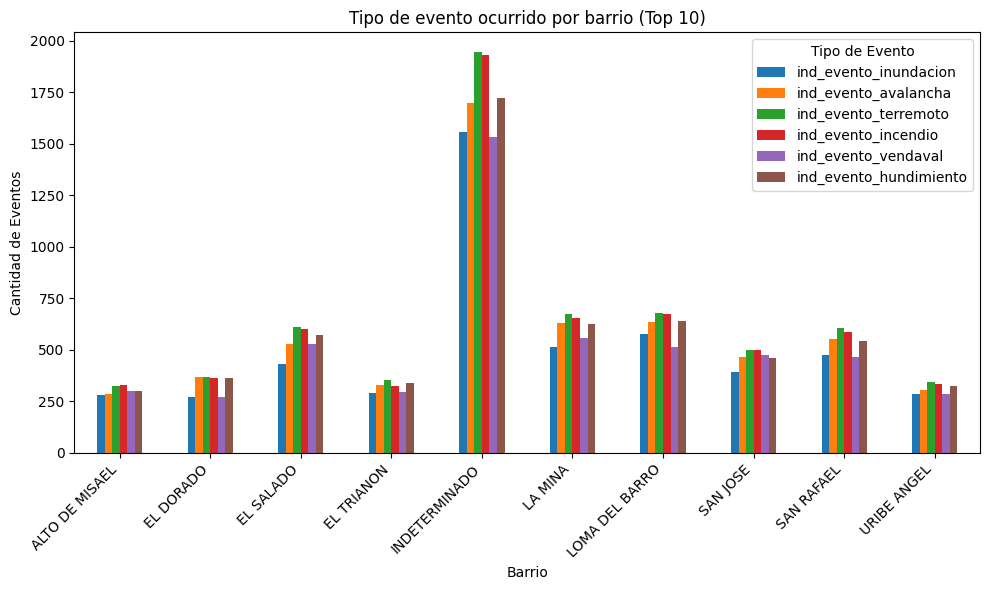

In [ ]:
# Filtrar el DataFrame para incluir solo los 10 barrios principales, iterar para obtener los 10 con mayor valor y crear lista

eventos_top_10 = Eventos_Adversos[Eventos_Adversos['NOM_BARRIO'].isin(top_10_barrios.index.tolist())]

# Se crea nuevo DF con las columnas requeridas para el top 10
Ocurrencia_Barrio_Top10 = eventos_top_10[['NOM_BARRIO', 'ind_evento_inundacion', 'ind_evento_avalancha', 'ind_evento_terremoto', 'ind_evento_incendio',
                                      'ind_evento_vendaval', 'ind_evento_hundimiento']]

# Se agrupan y suman los eventos por barrio para el top 10
eventos_barrios_agrupados_top10 = Ocurrencia_Barrio_Top10.groupby('NOM_BARRIO').sum()

# Elaboración de la grafica para el top 10
eventos_barrios_agrupados_top10.plot(kind='bar', figsize=(10, 6))
plt.title('Tipo de evento ocurrido por barrio (Top 10)')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Evento')
plt.tight_layout()
plt.show()

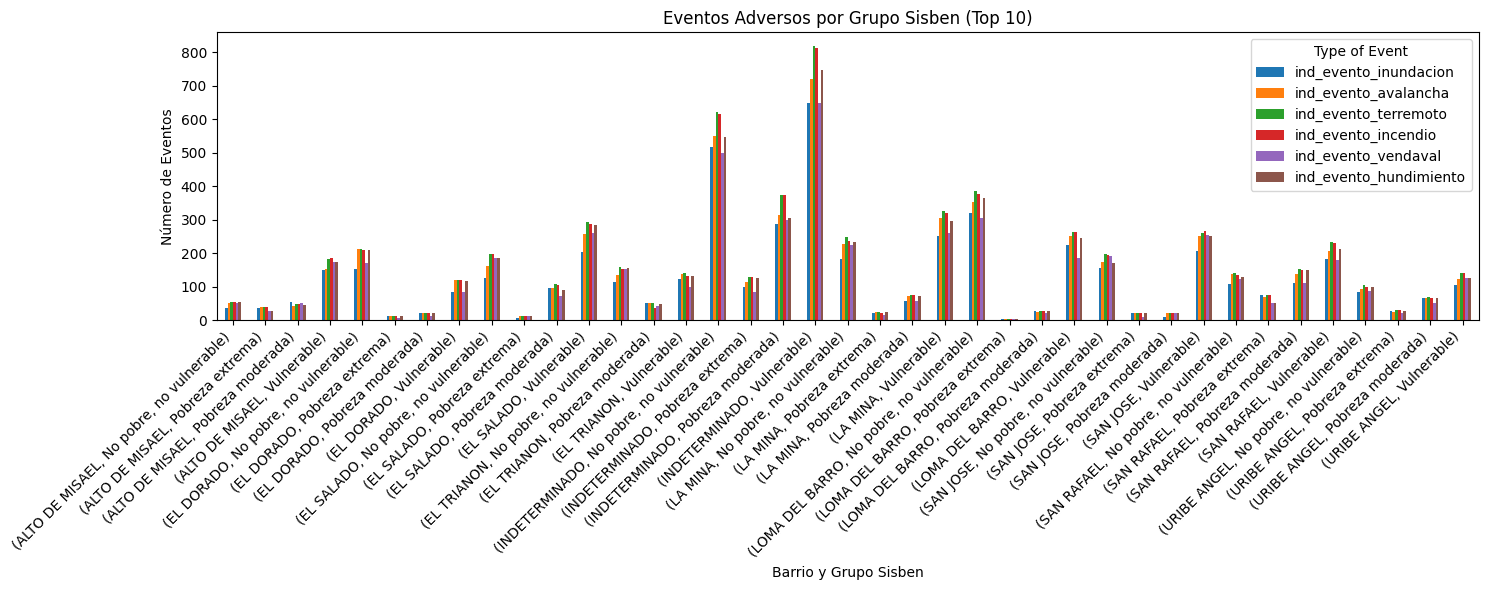

In [ ]:
# prompt: de cada barrio del top 10 anterior mostrar por Grupo_Sisben el total de Eventos_Adversos

# Group by neighborhood and Sisben group, then sum the adverse events
Eventos_Adversos_Top_10 = eventos_top_10.groupby(['NOM_BARRIO', 'Grupo_Sisben'])[['ind_evento_inundacion', 'ind_evento_avalancha', 'ind_evento_terremoto', 'ind_evento_incendio', 'ind_evento_vendaval', 'ind_evento_hundimiento']].sum()

Eventos_Adversos_Top_10.plot(kind='bar', figsize=(15, 6))
plt.title('Eventos Adversos por Grupo Sisben (Top 10)')
plt.xlabel('Barrio y Grupo Sisben')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type of Event')
plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats
import plotly.express as px  ## Graficas interactivas
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency  ## Tabla de contingencias
from scipy.stats import norm, kurtosis


## Definiendo una funcion para calcular chi-square e interpretacion de resultados
def perform_chi_square_test(data, col1, col2):
  ## Creando una tabla de contingencia
  contingency_table = pd.crosstab(data[col1], data[col2])
  ## Aplicando el test chi-square
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  ## Interpretando resultados
  significant = p < 0.05 ## Nivel de significancia del 5%
  print(f'El valor chi-square es: {round(chi2, 3)}, el p-values es igual a {(p)}, y la significancia es: {significant}')
  return

## Aspectos para probar en dataset de Matematicas
aspect_to_test = {'Tipo de vivienda vs. Inundación':('tip_vivienda', 'ind_evento_inundacion'),
                  'Alcantarillado vs. Inundación': ('ind_tiene_alcantarillado', 'ind_evento_inundacion'),
                  'Tipo de paredes vs. Inundación':('tip_mat_paredes', 'ind_evento_inundacion'),
                  'Tipo de pisos vs. Inundación':('tip_mat_pisos', 'ind_evento_inundacion')}

## Desarrollando las pruebas en aspectos adicionales
aspect_to_test = {aspect:perform_chi_square_test(Condiciones_Economicas_Final, *columns) for aspect, columns in aspect_to_test.items()}
aspect_to_test

#PRUEBA


El valor chi-square es: 638.402, el p-values es igual a 4.7637302915984576e-138, y la significancia es: True
El valor chi-square es: 615.39, el p-values es igual a 7.52476707715256e-136, y la significancia es: True
El valor chi-square es: 527.999, el p-values es igual a 7.798069358463852e-111, y la significancia es: True
El valor chi-square es: 711.188, el p-values es igual a 1.8715839289187616e-151, y la significancia es: True


{'Tipo de vivienda vs. Inundación': None,
 'Alcantarillado vs. Inundación': None,
 'Tipo de paredes vs. Inundación': None,
 'Tipo de pisos vs. Inundación': None}